# Example of Collecting Data from multiple files

In [ ]:
!pip install nltk

In [ ]:
!pip install wordcloud

In [ ]:
!pip install textblob

In [ ]:
!pip install flask

In [ ]:
import nltk
nltk.download("popular")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

In [1]:
import os
import pandas as pd
import nltk
path="data/reuters_data/"
files=os.listdir(path)
files

['training_money-fx_9138.txt',
 'training_money-fx_10340.txt',
 'training_crude_8440.txt',
 'training_money-fx_10354.txt',
 'training_money-fx_5070.txt',
 'training_money-fx_10368.txt',
 'training_crude_4246.txt',
 'training_crude_502.txt',
 'training_money-fx_8597.txt',
 'training_money-fx_9851.txt',
 'training_money-fx_9689.txt',
 'training_crude_2838.txt',
 'training_crude_3065.txt',
 'training_money-fx_12741.txt',
 'training_money-fx_1982.txt',
 'training_money-fx_10618.txt',
 'training_money-fx_3159.txt',
 'training_crude_11731.txt',
 'training_crude_10567.txt',
 'training_money-fx_2327.txt',
 'training_money-fx_9299.txt',
 'training_crude_1909.txt',
 'training_money-fx_12806.txt',
 'training_money-fx_12812.txt',
 'training_money-fx_12437.txt',
 'training_money-fx_10546.txt',
 'training_money-fx_6357.txt',
 'training_crude_2970.txt',
 'training_crude_489.txt',
 'training_crude_6294.txt',
 'training_money-fx_6394.txt',
 'training_crude_11491.txt',
 'training_crude_4333.txt',
 'trai

In [9]:
len(files)

927

In [10]:
os.path.join(path, files[1])

'data/reuters_data/training_money-fx_10340.txt'

In [11]:
f=open(os.path.join(path, files[1]),'r',encoding='latin-1')

In [12]:
text=""
for line in f:
    if line.strip()=="":continue #if line is blank skip it
    else:
        text+=' '+line.strip() #else append all lines
print(text)
f.close()

 ITALIAN 1987 GDP GROWTH FORECAST AT THREE PCT Italy's gross domestic product (GDP) will grow three pct in real terms this year and 2.7 pct in 1988, said economic information company Data Resources Europe Inc (DRI). Michel Girardin, DRI Europe's senior economist, said at a conference that Italian GDP growth this year "will be mainly driven by consumption and especially investment." Girardin said the driving force behind GDP growth next year will shift from domestic demand to exports as a result of expected depreciation of the lira against the major currencies. Italy's budget ministry said yesterday that GDP rose 2.7 pct in real terms in 1986. DRI forecast that inflation, which was an average 6.3 pct in 1986, will be under five pct this year and that interest rates should drop two pct. Girardin said the lira is expected to appreciate 14 pct against the dollar this year following last year's 22 pct appreciation. An expected German mark appreciation against the dollar means that the lira 

In [13]:
target=[]
article_text=[]
for file in files:
    if '.txt' not in file:continue
    f=open(os.path.join(path,file),
           encoding='latin-1')
    article_text.append(" ".join([line.strip() for line in
                                       f if line.strip()!=""]))
    if "crude" in file:
        target.append("crude")
    else:
        target.append("money")
    f.close()

In [16]:
article_text

['JAPAN DOES NOT INTEND TO CUT DISCOUNT RATE-SUMITA Bank of Japan governor Satoshi Sumita said the central bank has no intention of cutting its discount rate again as a way of preventing the yen\'s rise. He told a press conference that the growth of Japanese money supply remains high. The bank will have to watch closely various developments resulting from its already eased monetary stance, such as the sharp rise in real estate and stock prices, he said. Although the yen\'s rise will have a greater deflationary impact on the economy, the economy is not likely to slow down much further, Sumita said. "I don\'t think we should change our economic outlook at the moment," Sumita said. Sumita has said in the past that he expects the economy to show a gradual upturn in the second half of the year. The governor said the six major industrial nations are expected to review last month\'s pact on currency stability when they meet next in April. Dealers said they expect the six - Britain, Canada, Fr

In [14]:
mydata=pd.DataFrame({'target':target,'article_text':article_text})
mydata.shape

(927, 2)

In [17]:
mydata.sample(5)

,target,article_text
887,crude,SANTOS BIDS FOR OIL AND GAS COMPANY TMOC RESOU...
146,money,Dollar hits record low of 149.78 yen - Tokyo d...
828,crude,"MOSCOW SUPPORTS FREE GULF NAVIGATION, ENVOY SA..."
88,money,U.K. MONEY MARKET GIVEN FURTHER 195 MLN STG HE...
453,money,FED EXPECTED TO ADD RESERVES IN MARKET The Fed...


# Text Data Exploration with word cloud

Text data visualisation. Words with high frequency appear larger and words with low frequency appear smaller. 

In [18]:
from wordcloud import WordCloud

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
all_articles=' '.join(mydata['article_text']) #all articles combined into one single string

In [21]:
crude_articles=" ".join(mydata.loc[mydata['target']=='crude',
                                   'article_text']) #all crude articles combined into one single string

In [22]:
money_articles=" ".join(mydata.loc[mydata['target']=='money',
                                   'article_text']) #all money articles combined into one single string

(-0.5, 399.5, 199.5, -0.5)

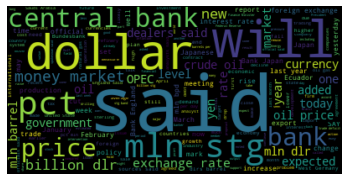

In [26]:
wordcloud = WordCloud().generate(all_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

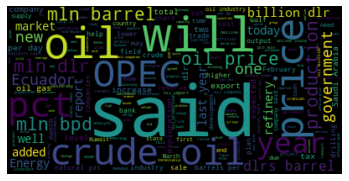

In [27]:
wordcloud = WordCloud().generate(crude_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

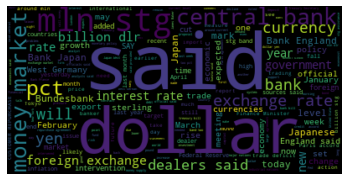

In [28]:
wordcloud = WordCloud().generate(money_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Text Data Exploration with nltk

In [29]:
from nltk import word_tokenize

In [30]:
tokens=word_tokenize(money_articles) #Breaking down the text into individual words
tokens

['JAPAN',
 'DOES',
 'NOT',
 'INTEND',
 'TO',
 'CUT',
 'DISCOUNT',
 'RATE-SUMITA',
 'Bank',
 'of',
 'Japan',
 'governor',
 'Satoshi',
 'Sumita',
 'said',
 'the',
 'central',
 'bank',
 'has',
 'no',
 'intention',
 'of',
 'cutting',
 'its',
 'discount',
 'rate',
 'again',
 'as',
 'a',
 'way',
 'of',
 'preventing',
 'the',
 'yen',
 "'s",
 'rise',
 '.',
 'He',
 'told',
 'a',
 'press',
 'conference',
 'that',
 'the',
 'growth',
 'of',
 'Japanese',
 'money',
 'supply',
 'remains',
 'high',
 '.',
 'The',
 'bank',
 'will',
 'have',
 'to',
 'watch',
 'closely',
 'various',
 'developments',
 'resulting',
 'from',
 'its',
 'already',
 'eased',
 'monetary',
 'stance',
 ',',
 'such',
 'as',
 'the',
 'sharp',
 'rise',
 'in',
 'real',
 'estate',
 'and',
 'stock',
 'prices',
 ',',
 'he',
 'said',
 '.',
 'Although',
 'the',
 'yen',
 "'s",
 'rise',
 'will',
 'have',
 'a',
 'greater',
 'deflationary',
 'impact',
 'on',
 'the',
 'economy',
 ',',
 'the',
 'economy',
 'is',
 'not',
 'likely',
 'to',
 'slow',

In [31]:
money_articles_Text=nltk.Text(tokens) #nltk based data structure
money_articles_Text, type(money_articles_Text)

(<Text: JAPAN DOES NOT INTEND TO CUT DISCOUNT RATE-SUMITA...>, nltk.text.Text)

In [33]:
#money_articles_Text.concordance('dollar') #for understanding the context of given words, as in where they are used in to article
#money_articles_Text.concordance('dlr')
money_articles_Text.concordance('bank')

Displaying 25 of 1025 matches:
T INTEND TO CUT DISCOUNT RATE-SUMITA Bank of Japan governor Satoshi Sumita sai
rnor Satoshi Sumita said the central bank has no intention of cutting its disc
nese money supply remains high . The bank will have to watch closely various d
 - to meet just before the IMF/World Bank interim committee meeting in Washing
wing last year 's 6.2 pct increase . BANK OF SPAIN SUSPENDS ASSISTANCE The Ban
ANK OF SPAIN SUSPENDS ASSISTANCE The Bank of Spain suspended its daily money m
nts . The suspension comes after the Bank yesterday gave 1,145 billion pesetas
 markets economist at Marine Midland Bank NA . `` The central banks are sendin
 senior corporate trader at one U.K. bank . On February 22 , the finance minis
 , the finance ministers and central bank governors of the U.S. , Japan , West
But dealers said the Federal Reserve Bank of New York gave traders a sharp rem
fered as to whether the U.S. central bank actually intervened to sell dollars 
 Wednesday , London d

In [34]:
money_articles_Text.similar('bank') #this is derived based on common contexts. Not as efficient as human reasoning.

dollar market fed bundesbank yen banks government treasury system
pound rate economy currencies currency ems meeting budget accord time
report


In [36]:
money_articles_Text.common_contexts(['bank','government'])

the_will the_on the_is the_would the_to the_was the_had the_still
the_does the_has the_which the_took


# Text Data features with tfidf 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer  

In [38]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize

lemma = WordNetLemmatizer() #for combining similar words together

my_stop=set(stopwords.words('english')+list(punctuation))

In [40]:
lemma.lemmatize("banks")

'bank'

In [41]:
my_stop #these words will not be used for analysis

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [42]:
def split_into_lemmas(message):
    message=message.lower()
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in my_stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [43]:
tfidf= TfidfVectorizer(analyzer=split_into_lemmas,
                       min_df=20,
                       max_df=500,
                       stop_words=my_stop)
#min no of occurence for a word to be considered for analysis is min_df = 50
#max_df is said to ignore the very common words that are redundant for analysis

In [44]:
tfidf.fit(mydata['article_text'])

TfidfVectorizer(analyzer=<function split_into_lemmas at 0x11e72f048>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=500, max_features=None,
                min_df=20, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
                            '+', ',', '-', '.', '/', ':', ';', '<', '=', '>',
                            '?', '@', '[', '\\', ']', '^', '_', '`', 'a',
                            'about', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [45]:
tfidf_data=tfidf.transform(mydata['article_text'])

In [46]:
tfidf_data.shape

(927, 795)

In [47]:
tfidf_data

<927x795 sparse matrix of type '<class 'numpy.float64'>'
	with 46952 stored elements in Compressed Sparse Row format>

# Sentiment Analysis with nltk

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [49]:
sentences = ["VADER is smart, handsome, and funny.",      # positive sentence example
            "VADER is not smart, handsome, nor funny.",   # negation sentence example
            "VADER is smart, handsome, and funny!",       # punctuation emphasis handled correctly (sentiment intensity adjusted)
            "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
            "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
            "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
            "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",# booster words & punctuation make this close to ceiling for score
            "The book was good.",                                     # positive sentence
            "The book was kind of good.",                 # qualified positive sentence is handled correctly (intensity adjusted)
        '''The plot was good, but the characters are uncompelling and 
             the dialog is not great.''', # mixed negation sentence
            "At least it isn't a horrible book.",         # negated negative sentence with contraction
            "Make sure you :) or :D today!",              # emoticons handled
            "Today SUX!",                                 # negative slang with capitalization emphasis
            "Today only kinda sux! But I'll get by, lol"  # mixed sentiment example with slang and constrastive conjunction "but"
             ]

In [50]:
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print(sentence, str(vs))

VADER is smart, handsome, and funny. {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is not smart, handsome, nor funny. {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
VADER is smart, handsome, and funny! {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny. {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY. {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!! {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!! {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
The book was good. {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
The book was kind of good. {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.3832}
The plot was good, but the characters are uncompelling and 
             the dialog is not great. {'neg'

# Language Correction, Detection and Translation with TextBlob

In [51]:
from textblob import TextBlob 

In [52]:
b = TextBlob("I havv goood color !")
b.correct(), b.detect_language()

(TextBlob("I have good color !"), 'en')

In [53]:
chinese_blob = TextBlob(u"美丽优于丑陋")

In [54]:
chinese_blob.translate(from_lang="zh-CN", to='en')

TextBlob("Beauty is better than ugly")

In [55]:
b = TextBlob(u"بسيط هو أفضل من مجمع")

In [56]:
b.detect_language()

'ar'

# Part Of Speech (POS) Tagging

source : https://stackoverflow.com/questions/1833252/java-stanford-nlp-part-of-speech-labels

* CC: conjunction, coordinating

    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
    
* CD: numeral, cardinal

    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
    
* DT: determiner

    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
    
* EX: existential there
    there
    
* FW: foreign word

    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
    
* IN: preposition or conjunction, subordinating

    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
    
* JJ: adjective or numeral, ordinal

    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
    
* JJR: adjective, comparative

    bleaker braver breezier briefer brighter brisker broader bumper busier
    calmer cheaper choosier cleaner clearer closer colder commoner costlier
    cozier creamier crunchier cuter ...
    
* JJS: adjective, superlative

    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...
    
* LS: list item marker

    A A. B B. C C. D E F First G H I J K One SP-44001 SP-44002 SP-44005
    SP-44007 Second Third Three Two * a b c d first five four one six three
    two
    
* MD: modal auxiliary

    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would
    
* NN: noun, common, singular or mass

    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
    
* NNS: noun, common, plural

    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
    
* NNP: noun, proper, singular

    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
    
* NNPS: noun, proper, plural

    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
    
* PDT: pre-determiner

    all both half many quite such sure this
    
* POS: genitive marker
    ' 's

* PRP: pronoun, personal

    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
    
* PRP$': pronoun, possessive

    her his mine my our ours their thy your
    
* RB: adverb

    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
    
* RBR: adverb, comparative

    further gloomier grander graver greater grimmer harder harsher
    healthier heavier higher however larger later leaner lengthier less-
    perfectly lesser lonelier longer louder lower more ...
    
* RBS: adverb, superlative

    best biggest bluntest earliest farthest first furthest hardest
    heartiest highest largest least less most nearest second tightest worst
    
* RP: particle

    aboard about across along apart around aside at away back before behind
    by crop down ever fast for forth from go high i.e. in into just later
    low more off on open out over per pie raising start teeth that through
    under unto up up-pp upon whole with you
    
* SYM: symbol

    % & ' '' ''. ) ). * + ,. < = > @ A[fj] U.S U.S.S.R * ** ***
    
* TO: "to" as preposition or infinitive marker

    to
    
* UH: interjection

    Goodbye Goody Gosh Wow Jeepers Jee-sus Hubba Hey Kee-reist Oops amen
    huh howdy uh dammit whammo shucks heck anyways whodunnit honey golly
    man baby diddle hush sonuvabitch ...
    
* VB: verb, base form

    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
    
* VBD: verb, past tense

    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
    
* VBG: verb, present participle or gerund

    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
    
* VBN: verb, past participle

    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
    
* VBP: verb, present tense, not 3rd person singular

    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
    
* VBZ: verb, present tense, 3rd person singular

    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
    
* WDT: WH-determiner
    that what whatever which whichever
    
* WP: WH-pronoun

    that what whatever whatsoever which who whom whosoever
    
* WP$: WH-pronoun, possessive

    whose
    
* WRB: Wh-adverb

    how however whence whenever where whereby whereever wherein whereof why

In [ ]:
sentence = "We hope you love your sleepycat mattress. Welcom to the sleepycat community."

In [ ]:
#nltk.download('averaged_perceptron_tagger')

In [ ]:
nltk.pos_tag(nltk.word_tokenize(sentence))